
Probability and Statistics are two branches of mathematics that deal with data, uncertainty, and patterns. 
While closely related, they serve distinct purposes and start from different perspectives.

1. **Probability**: The study of chance and the likelihood of events happening.
   - Focuses on predicting outcomes before they occur.
   - Answers questions like, *"Given a scenario, what is the likelihood of a particular outcome?"*

2. **Statistics**: The study of data collection, analysis, interpretation, and presentation.
   - Focuses on making sense of observed data.
   - Answers questions like, *"Based on observed data, what can we infer about the population?"*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import seaborn as sns


## Probability: The Study of Chance

Probability is a theoretical framework used to model the likelihood of outcomes in situations involving uncertainty. 
For example:
- The probability of flipping heads on a fair coin is 0.5.
- The probability of rolling any single number on a fair six-sided die is \( \frac{1}{6} \).

### Example: Theoretical Probability of Rolling a Die
- Outcomes: 1, 2, 3, 4, 5, 6.
- Probability of each outcome: \( \frac{1}{6} \) (assuming the die is fair).


In [2]:
outcomes = [1, 2, 3, 4, 5, 6]
probability_each = 1 / len(outcomes)
print(f"Probability of each outcome (1-6): {probability_each}")


Probability of each outcome (1-6): 0.16666666666666666


## Probability of Getting Heads in Coin Flips

We can use probability to predict the likelihood of observing a certain number of heads when flipping a coin multiple times. 
Here:
- **n_flips**: Number of coin flips.
- **p_heads**: Probability of getting heads in a single flip (0.5 for a fair coin).
- **Binomial Distribution**: Used to model the number of successes (heads) in \( n \) independent trials.


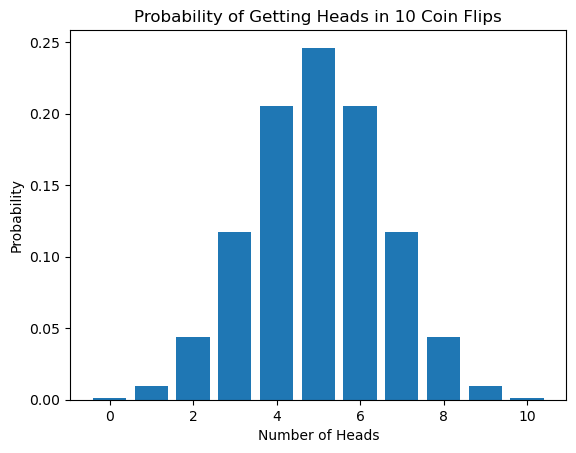

In [3]:
# Probability of getting heads (p=0.5), 10 coin flips
n_flips = 10
p_heads = 0.5
x = np.arange(0, n_flips+1)
probabilities = binom.pmf(x, n_flips, p_heads)

# Plot the probability distribution
plt.bar(x, probabilities)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("Probability of Getting Heads in 10 Coin Flips")
plt.show()


## Statistics: From Data to Insights

Unlike probability, statistics starts with observed data and tries to draw conclusions. 
For example:
- Observing 100 rolls of a die and analyzing the frequency of each face.
- Comparing the observed frequencies to theoretical expectations to infer if the die is fair.

### Key Concepts in Statistics
- **Population**: The entire group we want to study.
- **Sample**: A subset of the population used for analysis.
- **Descriptive Statistics**: Summarizing and describing data.
- **Inferential Statistics**: Drawing conclusions about the population based on sample data.


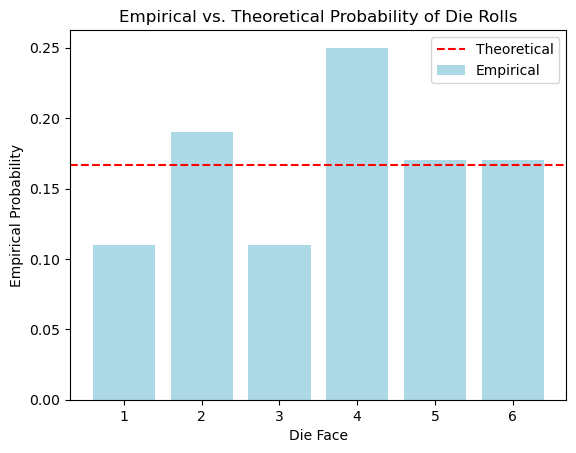

In [4]:
np.random.seed(42)  # For reproducibility
rolls = np.random.randint(1, 7, size=100)  # Simulate 100 die rolls

# Calculate the frequency of each outcome
frequencies = [np.sum(rolls == outcome) for outcome in outcomes]
empirical_probabilities = np.array(frequencies) / 100

# Plot the empirical probabilities
plt.bar(outcomes, empirical_probabilities, color="lightblue", label="Empirical")
plt.axhline(y=probability_each, color='r', linestyle='--', label="Theoretical")
plt.xlabel("Die Face")
plt.ylabel("Empirical Probability")
plt.title("Empirical vs. Theoretical Probability of Die Rolls")
plt.legend()
plt.show()


Bridging Probability and Statistics

Probability and Statistics are closely related fields, often working hand-in-hand to draw conclusions from data. Probability theory provides the foundation for statistical inference by giving us a theoretical model of what we should expect to observe in an ideal scenario. This enables us to compare real-world data with theoretical expectations and decide whether the data behaves as expected or shows significant deviations.

In statistical inference, we often use hypothesis testing to determine whether our observations fit a certain assumption. Here, probability helps us understand how likely or unlikely an observed result is if a particular hypothesis is true.

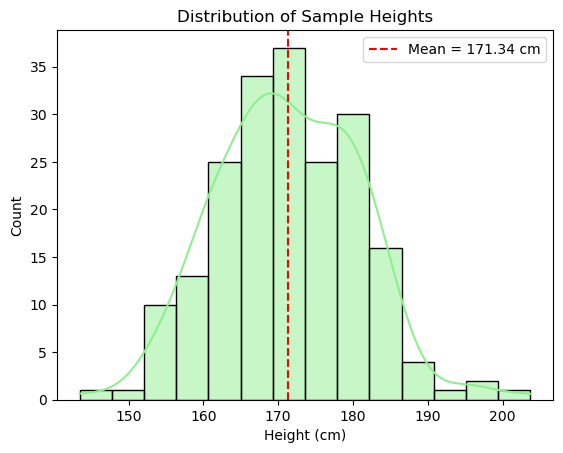

In [5]:
# Generate a sample of heights with a mean of 170 cm and standard deviation of 10 cm
heights = np.random.normal(170, 10, 200)

# Plot histogram
sns.histplot(heights, kde=True, color="lightgreen")
plt.xlabel("Height (cm)")
plt.title("Distribution of Sample Heights")
plt.axvline(np.mean(heights), color="r", linestyle="--", label=f"Mean = {np.mean(heights):.2f} cm")
plt.legend()
plt.show()


## Statistics in Practice: Analyzing Heights

In real-world scenarios, statistics is often used to analyze patterns in sample data.
For instance:
- **Distribution**: Visualizing how a variable (e.g., height) is distributed.
- **Inference**: Using sample statistics (mean, variance) to estimate population characteristics.


In [6]:
from scipy.stats import chisquare

# Observed frequency (from simulation)
observed_frequencies = frequencies
expected_frequencies = [100 / 6] * 6  # Expected frequency for a fair die

# Perform Chi-Square test
chi2_stat, p_value = chisquare(observed_frequencies, expected_frequencies)
print(f"Chi-Square Statistic: {chi2_stat:.2f}, p-value: {p_value:.2f}")

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis: the die might not be fair.")
else:
    print("We fail to reject the null hypothesis: the die appears fair.")


Chi-Square Statistic: 8.36, p-value: 0.14
We fail to reject the null hypothesis: the die appears fair.
